In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn import metrics 



Load Data in a Data Frame

In [30]:
# Load CSV file
dataset = pd.read_csv('boston.csv')
# print(dataset.head())
# print(dataset.info())
# print(dataset.describe())

Print First Rows

In [31]:
def print_summarize_dataset(dataset):
   print("Dataset dimension:", dataset.shape)

   print("\nFirst 10 rows of dataset:")
   print(dataset.head(10))
   print("\nStatistical summary:")
   print(dataset.describe())

print_summarize_dataset(dataset)

Dataset dimension: (506, 14)

First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  

Clean the dataset

In [32]:
def clean_dataset(dataset):
    return dataset.dropna()

dataset = clean_dataset(dataset)

Generate histograms

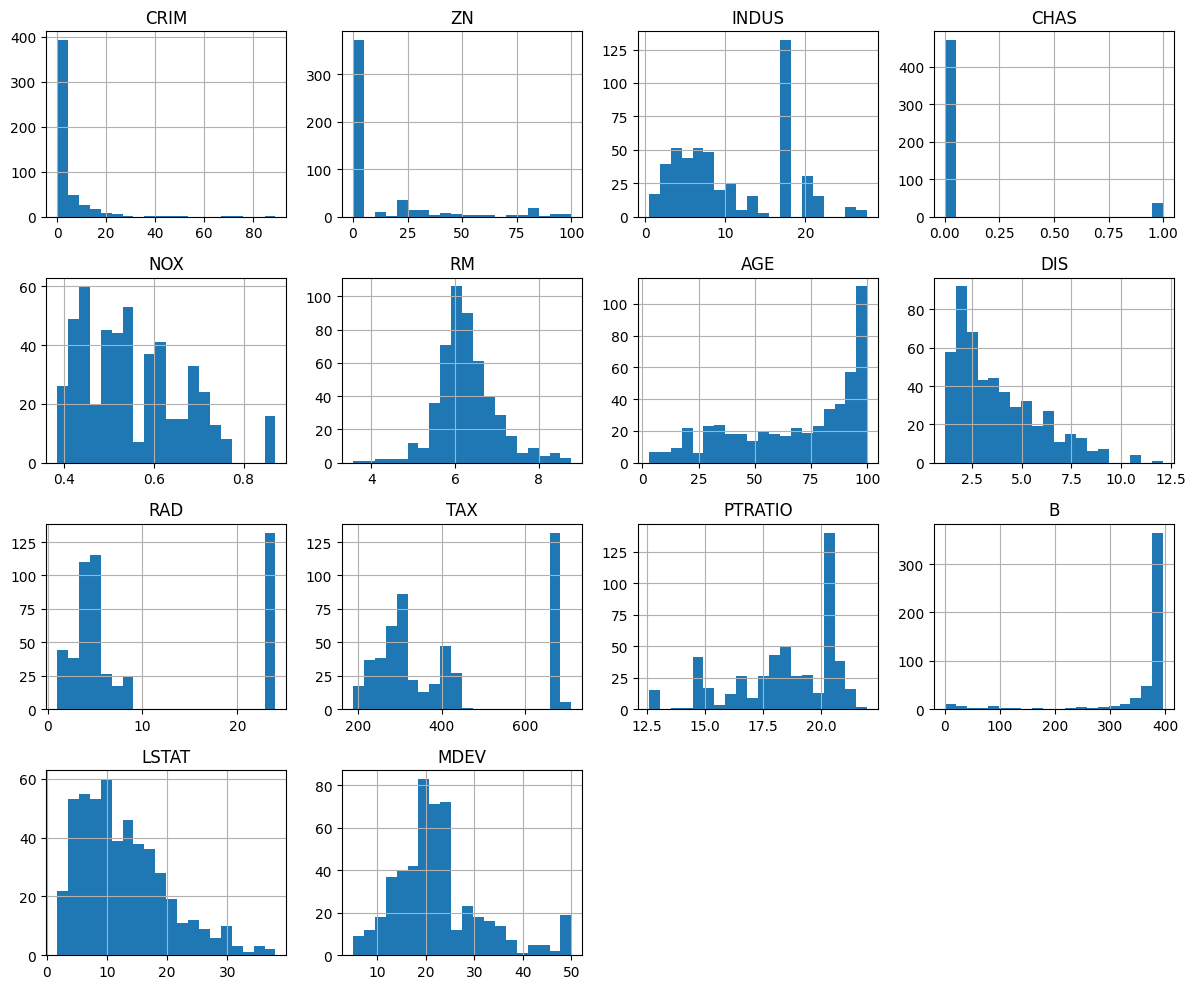

In [33]:
def print_histograms(dataset):
    dataset.hist(figsize=(12, 10), bins=20)
    plt.tight_layout()
    plt.show()

print_histograms(dataset)

Correlation Matrix

In [34]:
def compute_correlations_matrix(dataset):
    """
    Computes the Pearson correlation matrix for the dataset 
    and returns it as a dictionary
    """
    correlation_matrix = dataset.corr() # Compute corr matrix
    return correlation_matrix.to_dict() # Convert to dictionary

correlations = compute_correlations_matrix(dataset)

# Access correlations for "MDEV"
if 'MDEV' in correlations:
    print("Correlations with MDEV:", correlations['MDEV'])
else:
    print("Column 'MDEV' not found in dataset.")

Correlations with MDEV: {'CRIM': -0.38583168988399014, 'ZN': 0.3604453424505433, 'INDUS': -0.48372516002837285, 'CHAS': 0.17526017719029868, 'NOX': -0.4273207723732821, 'RM': 0.6953599470715401, 'AGE': -0.3769545650045961, 'DIS': 0.249928734085904, 'RAD': -0.38162623063977735, 'TAX': -0.4685359335677667, 'PTRATIO': -0.5077866855375623, 'B': 0.3334608196570662, 'LSTAT': -0.7376627261740145, 'MDEV': 1.0}


Scatter Matrix

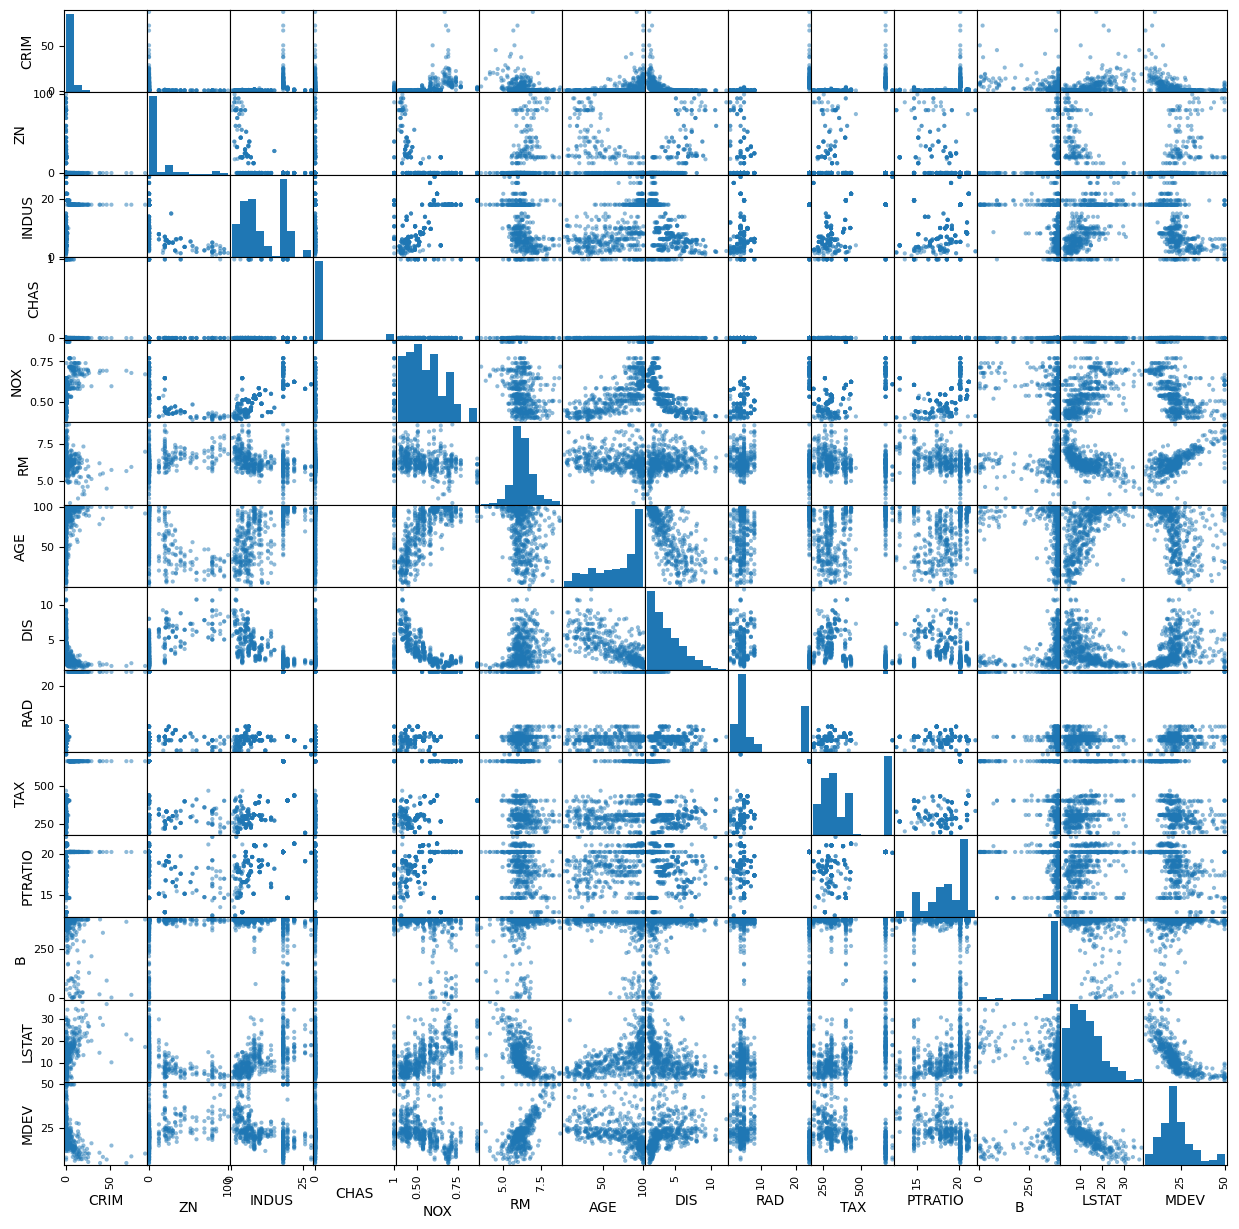

In [35]:
def print_scatter_matrix(dataset):
    pd.plotting.scatter_matrix(dataset, figsize=(15, 15), diagonal='hist')
    plt.show()

print_scatter_matrix(dataset)

In [36]:
def plot_scatter(dataset, x_col, y_col):
    """
    Plots a scatter plot for 2 given columns
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(dataset[x_col], dataset[y_col], alpha=0.6)
    plt.title(f"{y_col} vs. {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid()
    plt.show()

    plot_scatter(dataset, 'RM', 'MDEV')
    plot_scatter(dataset, 'AGE', 'MDEV')
    plot_scatter(dataset, 'LSAT', 'MDEV')
    plot_scatter(dataset, 'CRIM', 'MDEV')


Model Training

In [37]:
def boston_fit_model(dataset):
    model_dataset = dataset[["RM", "MDEV"]]
    x = model_dataset.iloc[:, :-1].values
    y = model_dataset.iloc[:, 1].values
    regressor = LinearRegression()
    regressor.fit(x, y)
    return regressor

model = boston_fit_model(dataset)

Prediction

In [38]:
def boston_predict(estimator, array_to_predict):
    return estimator.predict([array_to_predict])

prediction = boston_predict(model, [6])
print("Prediction:", prediction)

Prediction: [19.94203311]


Model Evaluation

In [39]:
def print_model_prediction_evaluator(base_test, prediction):
    print("Mean Absolute Error:", metrics.mean_absolute_error(base_test, prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(base_test, prediction))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(base_test, prediction)))

# Example usage with dummy data
base_test = [24, 21, 28]
predictions = [23.5, 21.2, 28.1]
print_model_prediction_evaluator(base_test, predictions)


Mean Absolute Error: 0.2666666666666669
Mean Squared Error: 0.09999999999999999
Root Mean Squared Error: 0.31622776601683794
